## Owlstone exemplar data analysis assignment

In [1]:
"""
Created on Thu Aug 24 19:36:27 2017
@author: miguelesteras
"""
# import libraries 
import numpy as np
from scipy import stats
import pandas as pd
from detect_peaks import *
from matplotlib import pyplot as plt
from __future__ import division, print_function

In [2]:
# Load csv files as dataframes and convert them to np.arrays
matrix_data    = pd.read_csv('/Users/miguelesteras/Desktop/OwlStone/test_matrix.csv')
peripheral_data = pd.read_csv('/Users/miguelesteras/Desktop/OwlStone/test_peripheral_dat.csv')

<br>
### Task 1: Inspect the peripheral data and comment on the stability of the conditions over the time

#### Descriptive Statistics

In [3]:
peripheral_data.iloc[:,1:].describe()

,Time step (secs),differential pressure (mbar),inlet_temperature_tc74 (degc),detector_region_temperature (degc),mosfet_temperature (degc),dispersion_voltage (v),inlet_temperature_sht15 (degc),relative_humidity (%rh),dewpoint (degc),outlet_temperature (degc),absolute_pressure (mbar),control_pcb_temperature (degc),analogue_pcb_temperature (degc),inlet_flow (ml/min)
count,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.001685,9.366852,50.129630,50.0,41.185185,32.129707,40.302361,4.503704,-7.920370,47.216481,1001.314815,51.641574,54.182639,38.974074
std,0.000469,0.029957,0.674223,0.0,0.551980,17.988373,0.316283,0.038671,0.184677,0.355065,0.059582,0.422957,0.446212,0.103131
min,0.001000,9.300000,49.000000,50.0,40.000000,0.000000,40.000000,4.400000,-8.300000,47.000000,1001.200000,51.300000,53.800000,38.800000
25%,0.001000,9.350000,50.000000,50.0,41.000000,20.250000,40.100000,4.500000,-8.000000,47.100000,1001.300000,51.400000,53.900000,38.900000
50%,0.002000,9.360000,50.000000,50.0,41.000000,33.500000,40.200000,4.500000,-7.900000,47.100000,1001.300000,51.450000,54.050000,38.950000
75%,0.002000,9.380000,51.000000,50.0,41.750000,46.750000,40.300000,4.500000,-7.900000,47.200000,1001.375000,51.775000,54.300000,39.000000
max,0.002000,9.460000,51.000000,50.0,42.000000,60.000000,41.307500,4.600000,-7.400000,48.380000,1001.400000,52.992500,55.657500,39.300000


<br>
#### Peripheral Data Visualization (Considering no time dependency)
The peripheral data is standarized to z-score along each variable to be plotted in a unique graph. z-score return nan values for vectors with std=0, hence nan values are converted into '0' before plotting.
<br><br>

/Users/miguelesteras/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


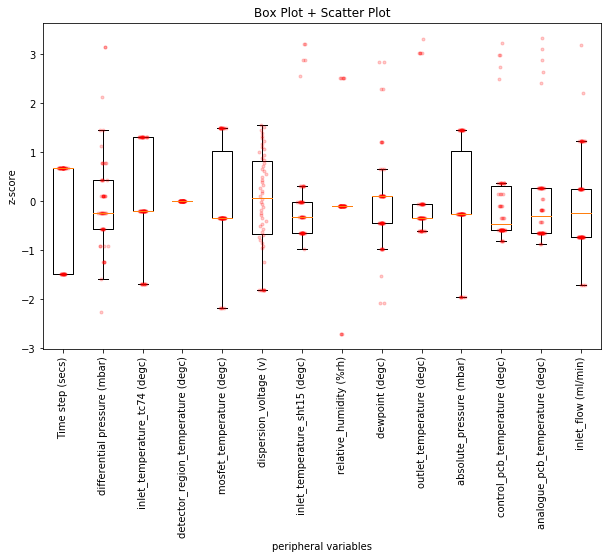

In [4]:
peripheral_np = np.transpose(peripheral_data.as_matrix())
peripheral_z = np.nan_to_num(np.apply_along_axis(stats.zscore, 1, peripheral_np[1:,:]), copy=False)
peripheral_plot = peripheral_z.tolist()
labels = list(peripheral_data.columns.values[1:])

# plot boxplot and scatterplot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
plt.xticks(peripheral_np[0], labels, rotation='vertical')
axes.boxplot(peripheral_plot,0,'') 
axes.set_title('Box Plot + Scatter Plot')
for i in range(0,len(peripheral_plot)):
    y = peripheral_plot[i]
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+1, 0.04, size=len(y))
    axes.plot(x, y, 'r.', alpha=0.2)
    
axes.set_xticklabels(labels)
axes.set_xlabel('peripheral variables')
axes.set_ylabel('z-score')

plt.show()

<br>
#### Time series peripheral data visualization


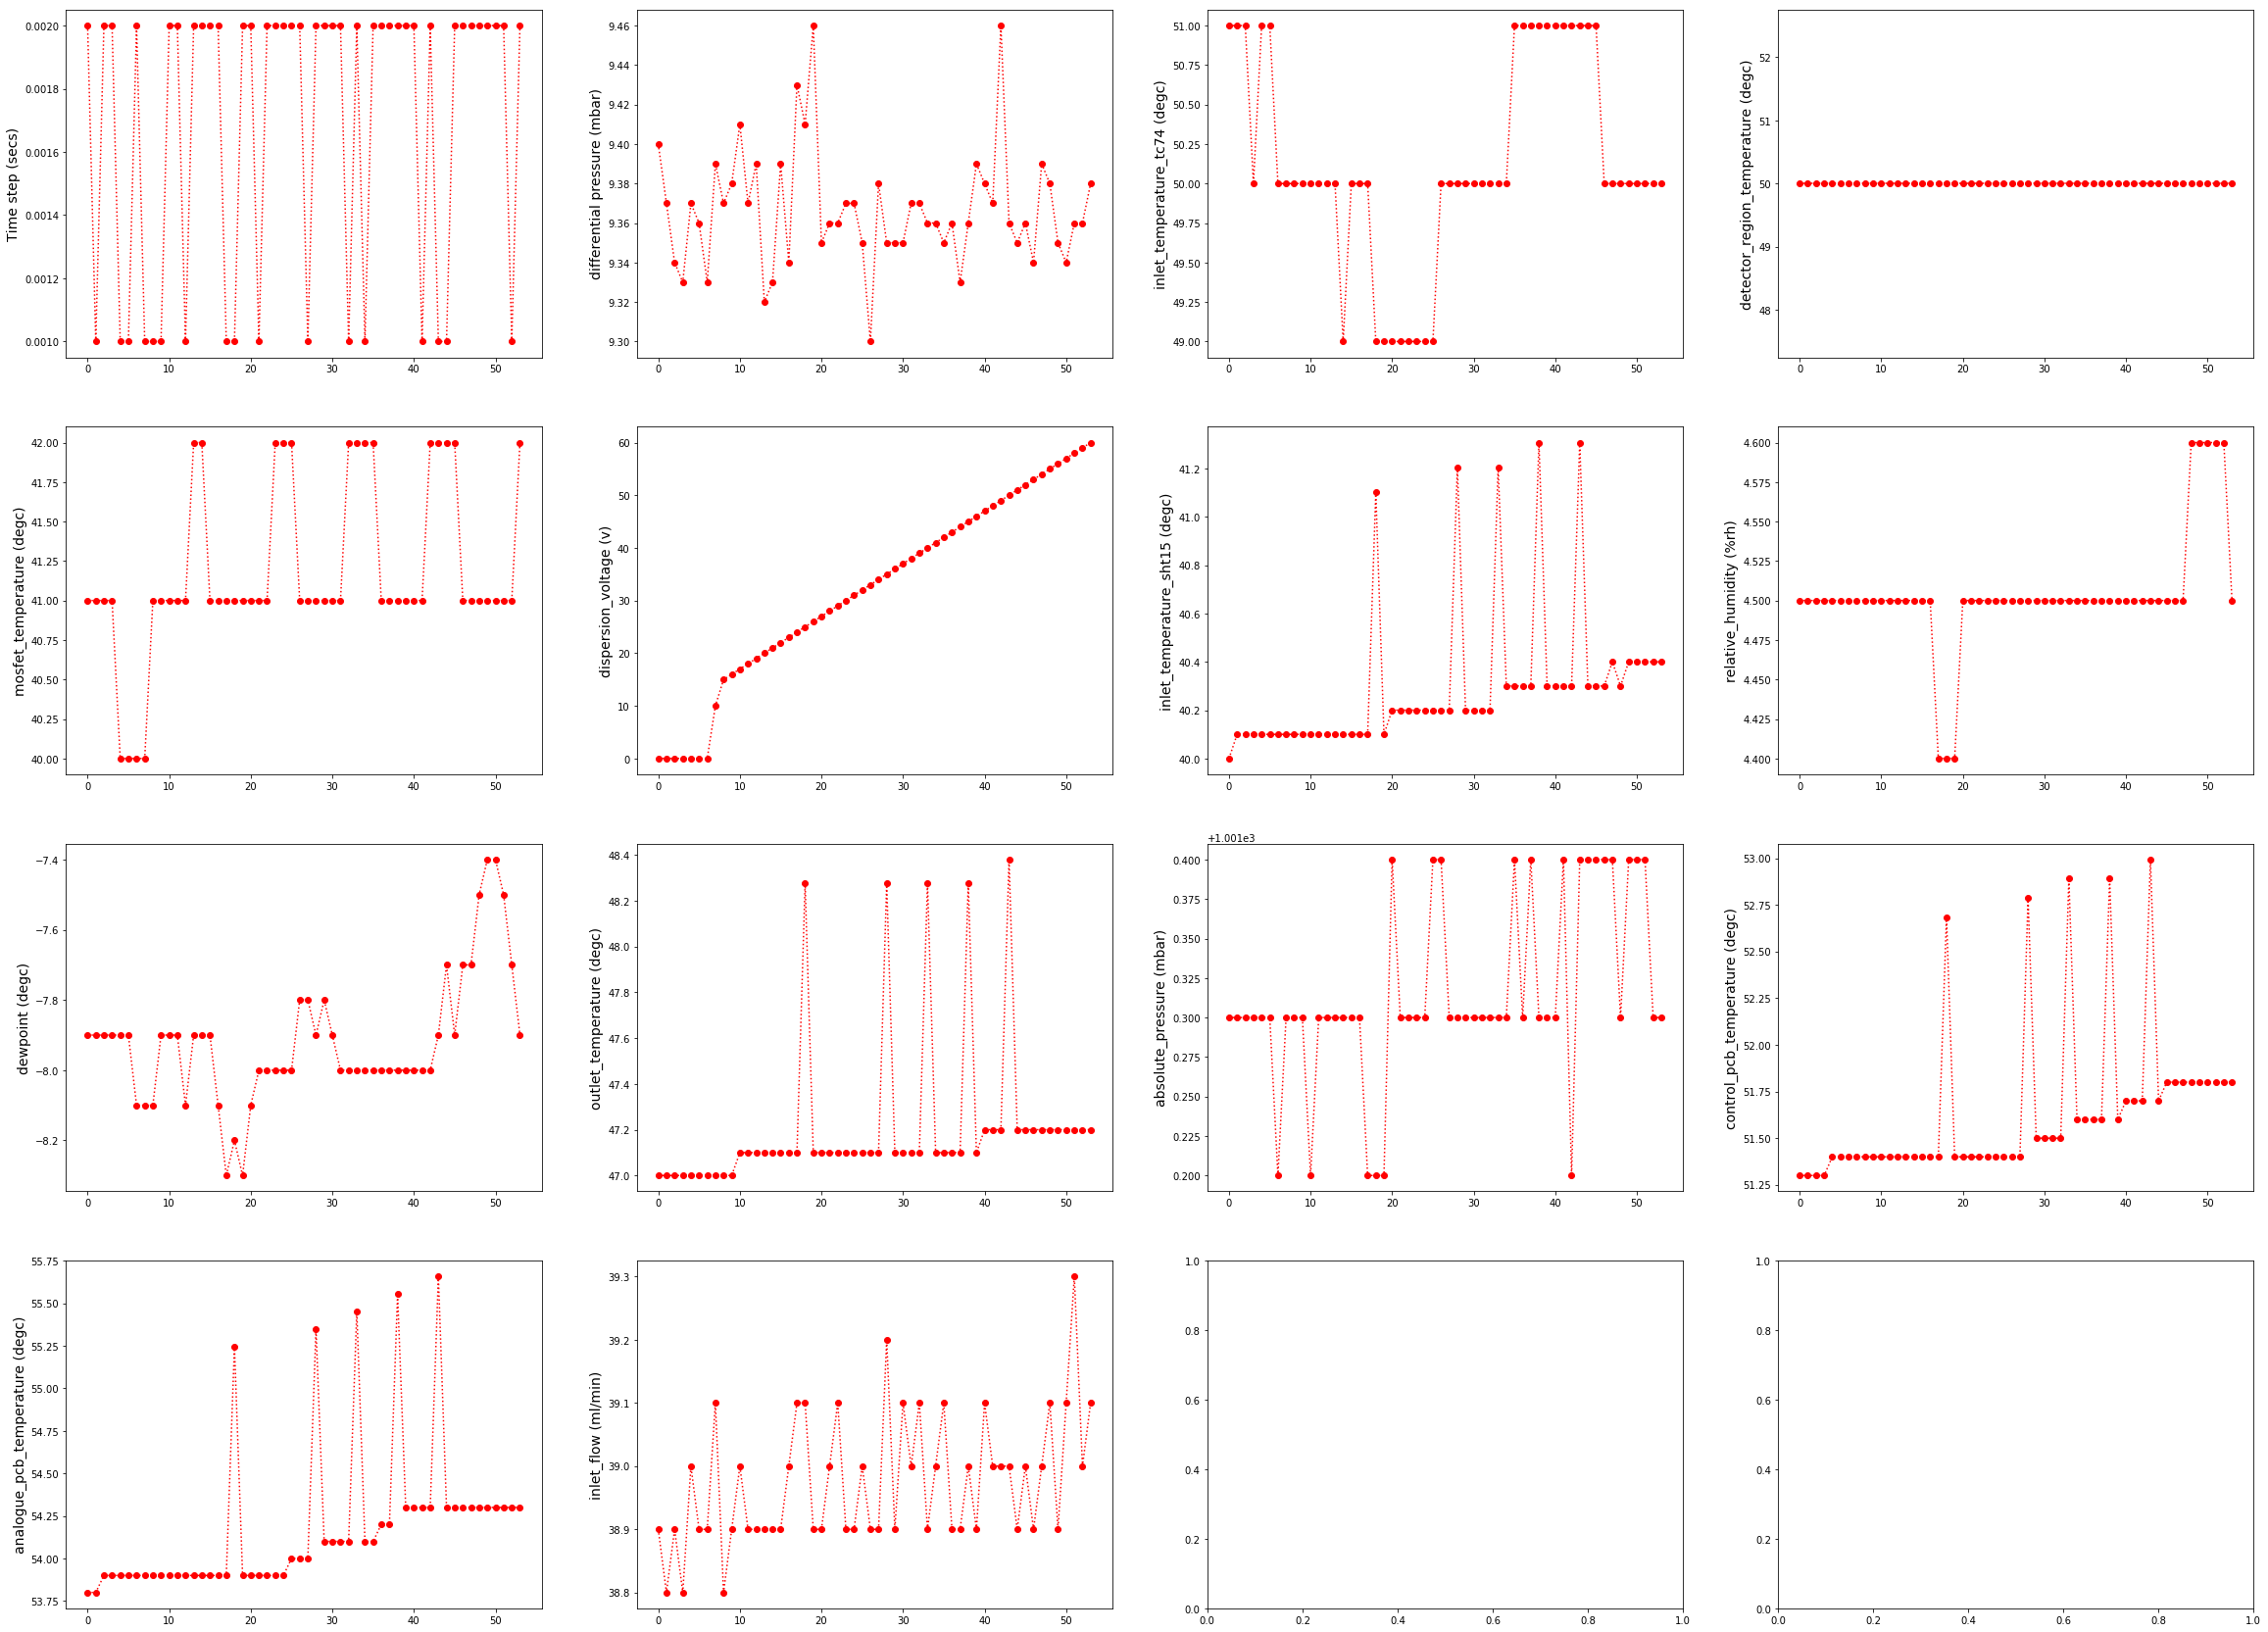

In [5]:
# visualization in grid format
peripheral_plot2 = peripheral_np[1:,:].tolist()
size = np.ceil(np.sqrt(len(peripheral_plot2)))
fig2, axes2 = plt.subplots(nrows=int(size),
                           ncols=int(size), figsize=(40, 30))
ax = axes2.flatten()
for j in range(0,len(peripheral_plot2)):
    ax[j].plot(peripheral_plot2[j], 
                 linestyle=':', marker='o', color='r')
    ax[j].set_ylabel(labels[j], fontsize=14)
    
plt.show()

inlet_temperature_sht15 (degc)  &  outlet_temperature (degc)  &  control_pcb_temperature (degc)  &  analogue_pcb_temperature (degc)


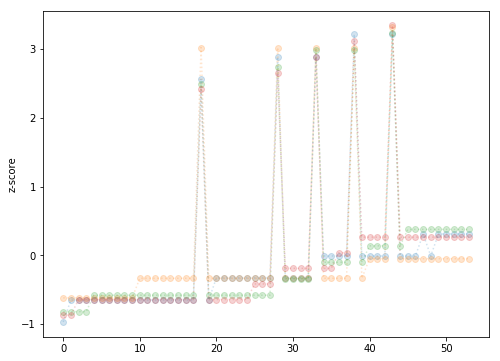

In [6]:
# Comparison of some variables (example) 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
selection = [6,9,11,12]
title = []
for i in selection:
    axes.plot(peripheral_plot[i], linestyle=':', marker='o', alpha=0.2)
axes.set_ylabel('z-score')

print (labels[6],' & ',labels[9],' & ',labels[11],' & ',labels[12])
plt.show()

<br>
### Conclusions from Peripheral Data Visualization (based on time series, assuming a temporal order)

Some peripheral measures vary greatly. Some correlate (see example above) others seem to be time independent and move between few values (eg. mosfet_temperature and inlet_flow) other might be time-dependent (eg. dispersion voltage). A better understanding of the nature of the measurements might reveal a causation effect in the data. These observations might explain the temporal pattern observed in the matrix data (see below study).

<br>
### Task 2: Exploratory data analysis on the test_matrix data set

#### Descriptive Statistics

In [7]:
matrix_data.describe()

,CV\Line,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,-0.000140,24.483601,24.682366,24.653501,22.701500,22.385303,22.122878,22.342262,23.795246,21.959054,...,7.336951,7.327109,7.311907,7.296896,7.282312,7.311612,7.305936,7.274480,7.262764,7.255726
std,4.336541,81.600521,81.588480,81.432806,73.197916,71.806853,70.672866,71.486507,77.382957,68.919470,...,0.300356,0.296401,0.274192,0.252181,0.251486,0.251821,0.308164,0.276490,0.300491,0.239580
min,-7.499520,6.330872,6.509399,6.481934,6.234741,6.632996,6.550598,6.481934,6.481934,6.578064,...,6.523387,6.660461,6.605530,6.627236,6.591797,6.646729,6.221011,6.564331,6.330872,6.619263
25%,-3.749830,6.866455,7.031250,7.055353,7.058716,7.058716,7.086182,7.099914,7.058716,7.044983,...,7.137690,7.127380,7.127380,7.113647,7.099914,7.127380,7.087418,7.072449,7.031250,7.072449
50%,-0.000140,7.058716,7.227414,7.223511,7.223511,7.250976,7.250976,7.278442,7.223511,7.223511,...,7.319641,7.292175,7.284523,7.278442,7.278442,7.306545,7.305908,7.278442,7.264709,7.250976
75%,3.749550,7.264709,7.443237,7.419205,7.459802,7.456970,7.443237,7.470703,7.456970,7.456970,...,7.475906,7.500460,7.484436,7.456970,7.456970,7.479511,7.511902,7.456970,7.470703,7.419205
max,7.499240,570.027542,569.343657,568.349713,517.731505,508.591194,501.475088,506.426138,540.538737,482.429807,...,8.770279,8.578694,8.229509,8.129575,8.047485,8.377075,8.212280,8.102417,8.102417,8.088684


<br>

#### Extract FWHM
The function used to detect peaks is a modification of a function written by Marcos Duarte, and it is modeled after the MatLab findpeaks. Parameters like can be optimized to filter some false positive peaks based on peak intensity compared with background, distance between peaks and others.

Once peaks are detected, FWHM are detected based on a walk left and right from the peak, looking for the first value that is true for value < half the max height 'HM' (this height is calculated based on half point between peak intensity and min value in the series, there are alternatives to this eg. using 25% quantile). The two values around the HM are interpolated to calculate the exact value for x, at each side. The distance/width in x between this two points is the FWHM.

In [8]:
matrix_np = np.transpose(matrix_data.as_matrix())
matrix_plot = matrix_np[1::].tolist()

# detect peaks and calculate FWHM. mph = minimum peak height. mpd = minimum horizontal distance
peaks = []
fwhm = []
numPeaks = np.zeros(len(matrix_plot))
maxPeak = np.zeros(len(matrix_plot))
CV = matrix_np[0]
mpd = 20
k=0
for faims in matrix_plot:
    mph = 2*np.std(faims)+np.median(faims)
    ind = detect_peaks(faims, CV, mph=mph, mpd=mpd, threshold=0, edge='rising',
                       kpsh=False, valley=False, show=False, ax=None)
    peaks.append(ind.tolist())
    numPeaks[k] = len(ind)
    maxPeak[k] = max(faims)
    k=k+1
    width = []
    for peak in ind:
        width.append(find_FWHM(np.asarray(faims), peak))
    fwhm.append(width) #  python list variable storing FWHM for all series. Each value correspond (same index) variable peaks


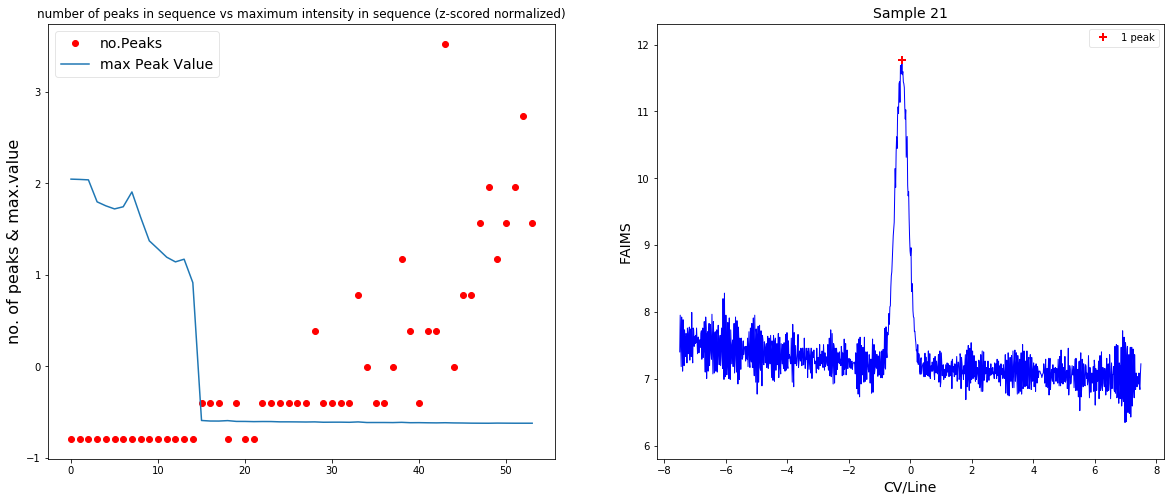

In [9]:
# plot example
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
axes[0].plot(stats.zscore(numPeaks), 'ro', label='no.Peaks')
axes[0].plot(stats.zscore(maxPeak), label='max Peak Value')
axes[0].set_ylabel('no. of peaks & max.value', fontsize=16)
axes[0].legend(loc='best', framealpha=.5, numpoints=1, fontsize=14)
axes[0].set_title('number of peaks in sequence vs maximum intensity in sequence (z-scored normalized)')

mph = 2*np.std(matrix_plot[21])+np.median(matrix_plot[21])
ind = detect_peaks(matrix_plot[21], CV, mph=mph, mpd=mpd, threshold=0, edge='rising',
                       kpsh=False, valley=False, show=True, ax=axes[1],title='Sample 21')


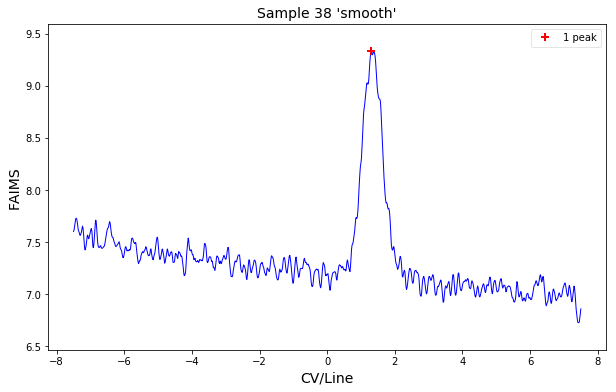

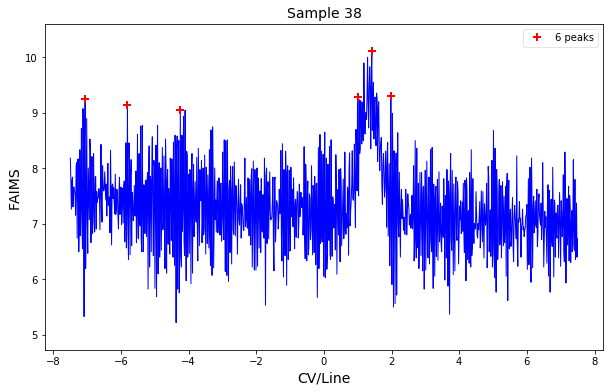

In [10]:
# smooth signal
window='hanning'
window_len=11    
matrix_smooth = []
for x in matrix_plot:
    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]  
    w=eval('np.'+window+'(window_len)')  
    y=np.convolve(w/w.sum(),s,mode='valid')
    matrix_smooth.append(y.tolist())

# plot example
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
y = matrix_smooth[38] 
CV2 = np.linspace(min(CV),max(CV),num=len(y))
mph = 2*np.std(y)+np.median(y)
ind = detect_peaks(y, CV2, mph=mph, mpd=mpd, threshold=0, edge='rising',
                       kpsh=False, valley=False, show=True, ax=axes, title="Sample 38 'smooth'")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
mph = 2*np.std(matrix_plot[38])+np.median(matrix_plot[38])
ind = detect_peaks(matrix_plot[38], CV, mph=mph, mpd=mpd, threshold=0, edge='rising',
                       kpsh=False, valley=False, show=True, ax=axes,title='Sample 38')


In [11]:
# detect peaks and calculate FWHM from smoothed signal. 
peaksSM = []
fwhmSM = []
numPeaksSM = np.zeros(len(matrix_smooth))
maxPeakSM = np.zeros(len(matrix_smooth))
CV = matrix_np[0]
mpd = 20
k=0
for faims in matrix_smooth:
    CV2 = np.linspace(min(CV),max(CV),num=len(faims))
    mph = 2*np.std(faims)+np.median(faims)
    ind = detect_peaks(faims, CV2, mph=mph, mpd=mpd, threshold=0, edge='rising',
                       kpsh=False, valley=False, show=False, ax=None)
    peaksSM.append(ind.tolist())
    numPeaksSM[k] = len(ind)
    maxPeakSM[k] = max(faims)
    k=k+1
    width = []
    for peak in ind:
        width.append(find_FWHM(np.asarray(faims), peak))
    fwhmSM.append(width) #  python list variable storing FWHM for all series.

<br>
### Task 3: Testing peak detection and FWHM algorithm

The peak detection might be improved; avoiding detection of small peaks part of a big one. Doing this by filtering peaks based on the gradients of the neighbourhood (left and right). For series with not constant baseline values (eg. sample 38), a moving median might be used to calculate the peak filter threshold. 

The FWHM algorithm can be made more robust. For series with not constant baseline values (as it is the case in some of the examples here), a moving min value or moving 25% quantile might be more suited to calculate the HM. This method is not robust in case of two peaks too close to each other. One possible resolution in this scenario could be fitting a mixture of gaussians (eg, 2 gaussians for two peaks) on the query distribution, and used the best fit gaussians to calculate the FWHM.

The algorithm could be put to the test against labeled data to quatify sensitivity and specificity.  

<br>
### Summary

Maximum peak intensities drop dramatically after the 15th iteration (from 331 to 14). After that, noise dificults greatly the detection of true positive peaks. These might be explained by the nature of the sample (no true positives are present in that fraction) or by some of the peripheral factors.

Smoothing the signal before detection of peaks can help reducing the number of false positives in cases of low intensity peaks within noisy data. 
Peak detection might be imporved by training a model for peak classification (eg. random forest); for which some labeled data (ground truth) is needed, as well as a suitable 'peak descriptor', a vector of variables that discribe and discriminates positives from negative. Some of these variables might be fwhm, height, CV, distance to neighbours,... 
<br>

<br>
### Functions

In [12]:

def detect_peaks(x, x2, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None, title='Peak Detection'):

    """Detect peaks in data based on their amplitude and other features.
    functions 'detect_peaks' & '_plot' have been modified from code by Marcos Duarte
    https://github.com/demotu/BMC

    Parameters
    ----------
    x : 1D array_like data.
    mph : detect peaks that are greater than minimum peak height.
    mpd : detect peaks that are at least separated by minimum peak distance (in number of data).
    threshold : detect peaks (valleys) that are greater (smaller) than `threshold` in relation to their immediate neighbors.
    edge : for a flat peak, keep only the rising edge ('rising'), only the falling edge ('falling'), both edges ('both'), or don't detect a flat peak (None).
    kpsh : keep peaks with same height even if they are closer than `mpd`.
    valley : if True (1), detect valleys (local minima) instead of peaks.
    show : if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    ind : 1D array_like indeces of the peaks in `x`.

    References
    ----------
    [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb

    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
        _plot(x, x2, mph, mpd, threshold, edge, valley, ax, ind, title)

    return ind




def _plot(x, x2, mph, mpd, threshold, edge, valley, ax, ind, title):
    """Plot results of the detect_peaks function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 4))

        ax.plot(x2, x, 'b', lw=1)
        if ind.size:
            label = 'valley' if valley else 'peak'
            label = label + 's' if ind.size > 1 else label
            ax.plot(x2[ind], x[ind], '+', mfc=None, mec='r', mew=2, ms=8,
                    label='%d %s' % (ind.size, label))
            ax.legend(loc='best', framealpha=.5, numpoints=1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax.set_xlabel('CV/Line', fontsize=14)
        ax.set_ylabel('FAIMS', fontsize=14)
        ax.set_title(title, y=1, fontsize=14)
        plt.show()




def find_FWHM(vec, peakIdx):
    halfmax = min(vec)+((vec[peakIdx]-min(vec))/2)  # half maximum height of peak
    ind1 = peakIdx
    ind2 = peakIdx   
# walk right and left from peak until halfmax value is passed. 
# If value is not in sequence the function returns a float nan value.    
    while vec[ind1]>halfmax:      
        if ind1 == 0:
            width = float('NaN')
            return width
        else:
            ind1=ind1-1
    while vec[ind2]>halfmax:
        if ind2 == len(vec)-1:
            width = float('NaN')
            return width
        ind2=ind2+1 

    # Interpolate the exact value of x for y=halfmax, left and right from the peak
    gradient1 = vec[ind1+1]-vec[ind1]
    gradient2 = vec[ind2]-vec[ind2-1]
    interpo1= ind1 + (halfmax -vec[ind1])/gradient1
    interpo2= ind2 + (halfmax -vec[ind2])/gradient2
    #calculate the width and return value
    width = interpo2-interpo1
    return width